In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from PIL import Image
from scipy.sparse import diags
from scipy.sparse.linalg import factorized

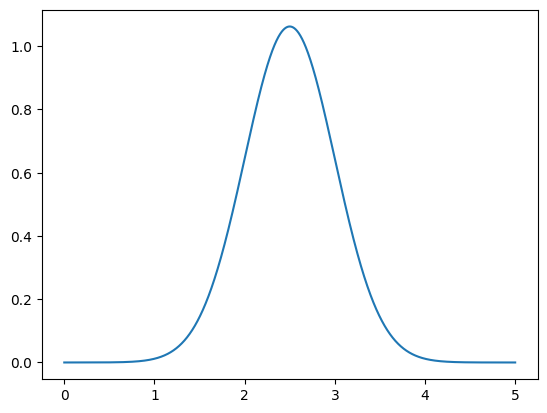

In [42]:
L = 5
T = 20

dx = 1e-3
dt = 1e-3

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)

Nt, Nx = len(t), len(x)

def u_0(x):
    "Initial Condition"
    s = 0.5
    m = L/2
    return 1/(np.pi*s**2)**(0.25) * np.exp(-0.5 * ((x-m)/s)**2)

def v_0(x):
    return np.zeros_like(x)

plt.plot(x, u_0(x), label='Initial Condition')
plt.show()

In [43]:

D  = 1/(2*dx) * diags([-1, 0, 1], [-1, 0, 1], shape=(Nx, Nx)).tolil()
D[0, [0,1,2]] = [0, 4/(2*dx), -1/(2*dx)]
D[-1, [-3,-2,-1]] = [1/(2*dx), -4/(2*dx), 0]
D = D.tocsr()

D2 = 1/(dx**2) * diags([1, -2, 1], [-1, 0, 1], shape=(Nx, Nx))
c  = 1
I  = diags([1], [0], shape=(Nx, Nx))

u = np.zeros((Nt, Nx))
v = np.zeros((Nt, Nx))

A = (I - (c*dt/2)**2 * D2)
B = (I + (c*dt/2)**2 * D2)
solve_u = factorized(A.tocsc())

for i, ti in enumerate(t):
    if i == 0:
        u[0, :] = u_0(x)
        v[0, :] = v_0(x)
    else:
        j  = i-1
        uj = u[j, :]
        vj = v[j, :] 
        tj = t[j]
        u[i, :] = solve_u(B@uj - c*dt*D@vj)
        v[i, :] = vj - (c*dt/2)*(D@u[i, :] + D@uj)
    
    if np.max(np.abs(u[i, :])) > 1e2:
        print(f"Blow up at time {ti:.3f}s")
        break
    
    if i % 1 == 0:
        print(f"Time {ti:.3f}s, max(u) = {np.max(np.abs(u[i, :])):.3f}")


Time 0.000s, max(u) = 1.062
Time 0.001s, max(u) = 1.062
Time 0.002s, max(u) = 1.062
Time 0.003s, max(u) = 1.062
Time 0.004s, max(u) = 1.062
Time 0.005s, max(u) = 1.062
Time 0.006s, max(u) = 1.062
Time 0.007s, max(u) = 1.062
Time 0.008s, max(u) = 1.062
Time 0.009s, max(u) = 1.062
Time 0.010s, max(u) = 1.062
Time 0.011s, max(u) = 1.062
Time 0.012s, max(u) = 1.062
Time 0.013s, max(u) = 1.062
Time 0.014s, max(u) = 1.062
Time 0.015s, max(u) = 1.062
Time 0.016s, max(u) = 1.062
Time 0.017s, max(u) = 1.062
Time 0.018s, max(u) = 1.062
Time 0.019s, max(u) = 1.061
Time 0.020s, max(u) = 1.061
Time 0.021s, max(u) = 1.061
Time 0.022s, max(u) = 1.061
Time 0.023s, max(u) = 1.061
Time 0.024s, max(u) = 1.061
Time 0.025s, max(u) = 1.061
Time 0.026s, max(u) = 1.061
Time 0.027s, max(u) = 1.061
Time 0.028s, max(u) = 1.061
Time 0.029s, max(u) = 1.060
Time 0.030s, max(u) = 1.060
Time 0.031s, max(u) = 1.060
Time 0.032s, max(u) = 1.060
Time 0.033s, max(u) = 1.060
Time 0.034s, max(u) = 1.060
Time 0.035s, max(u) 

In [44]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=round(1000/fps), loop=loop)

def make_plot(save=False, file_name=f"PDE_solution.png", ti=0):
    "Helper function for plotting"
    fig, ax = plt.subplots()
    ax.plot(x, u[i, :])
    ax.set_xlim(0, L)
    ax.set_ylim(-1.05, 1.05)
    ax.grid()
    ax.set_title(f"Time = {ti:.3f}s")
    if save:
        fig.savefig(file_name, bbox_inches="tight", pad_inches=0.1, dpi=100, facecolor="white")

In [45]:
import os
import shutil

folder_path="plots"
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # Remove file or symbolic link
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # Remove subdirectory and its contents
    except Exception as e:
        print(f"Failed to delete {item_path}. Reason: {e}")

In [46]:
files = []
fps   = 20
frame_indicies = np.linspace(0, Nt-1, int(fps*T), dtype=int)
for i in frame_indicies:
    ti = t[i]
    file = f"plots/PDE_sol_{ti:.5f}.png"
    make_plot(save=True, file_name=file, ti=ti)
    files.append(file)
    plt.close("all")
    
save_gif_PIL("PDE_solution.gif", files, fps=fps, loop=0)